In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip drive/MyDrive/Fertilizers_Recommendation_\ System_For_Disease_\ Prediction.zip

In [61]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=25,width_shift_range=0.1,
    height_shift_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
path_train = '/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'
path_test = '/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set'

In [5]:
x_train=train_datagen.flow_from_directory(path_train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(path_test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [6]:
model = Sequential()

In [7]:
# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 300, activation = 'relu'))
model.add(Dense(units = 150, activation = 'relu'))
model.add(Dense(units = 9, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 300)               8

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [10]:
history=model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 72s 133ms/step - loss: 1.2874 - accuracy: 0.5413 - val_loss: 0.6588 - val_accuracy: 0.7632
Epoch 2/10
475/475 [==============================] - 62s 131ms/step - loss: 0.6855 - accuracy: 0.7508 - val_loss: 0.5950 - val_accuracy: 0.7878
Epoch 3/10
475/475 [==============================] - 61s 128ms/step - loss: 0.5188 - accuracy: 0.8151 - val_loss: 0.4609 - val_accuracy: 0.8390
Epoch 4/10
475/475 [==============================] - 60s 127ms/step - loss: 0.4291 - accuracy: 0.8496 - val_loss: 0.3351 - val_accuracy: 0.8882
Epoch 5/10
475/475 [==============================] - 60s 125ms/step - loss: 0.3739 - accuracy: 0.8683 - val_loss: 0.3430 - val_accuracy: 0.8855
Epoch 6/10
475/475 [==============================] - 59s 125ms/step - loss: 0.3159 - accuracy: 0.8879 - val_loss: 0.2993 - val_accuracy: 0.8990
Epoch 7/10
475/475 [==============================] - 59s 125ms/step - loss: 0.2806 - accuracy: 0.9039 - val_loss: 0.2815 - val_ac

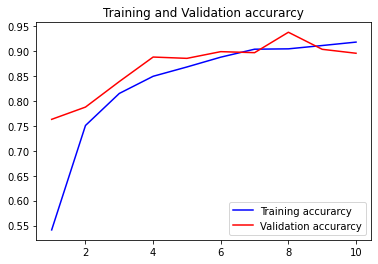

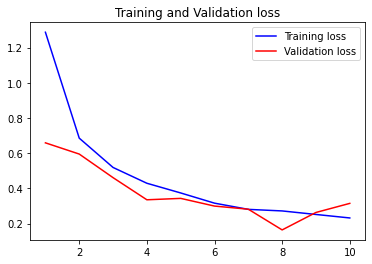

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [12]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
143/143 [==============================] - 6s 38ms/step - loss: 0.3147 - accuracy: 0.8958
Test Accuracy: 89.57845568656921


In [69]:
model.save('Vegetable.h5')